##### Dictionary Tables: Overview (Source: SAS Documentation)
Dictionary tables are Read-Only metadata views that contain session metadata, such as

* SAS libraries
* data sets
* external files in use or available in the current session

Dictionary tables are:

* created at SAS session
* updated automatically
* limited to Read-Only access

You can query dictionary tables with PROC SQL.


##### Querying Metadata about SAS Libraries
There are more than 30 dictionary tables. Below are three examples.
* DICTIONARY.TABLES (detailed information about tables)
* DICTIONARY.COLUMNS (detailed information about all columns of all tables)
* DICTIONARY.MEMBERS (general information about SAS library members)

##### Sashelp views
* select all views from dictionary.members
* dictionary.members can be used to select all views in sashelp.

In [ ]:
proc sql;
  select
    lowcase(memname)
  from
    dictionary.members
  where
    libname = 'SASHELP' and
    memtype = 'VIEW'
  order by
    memname;
quit;

##### Sashelp library dictionary view (Source: SAS(R) Institute's Slides)
* SAS provides views based on the dictionary tables in the Sashelp.library
* View names are similar to dictionary table names (shortened to 8 characters or less
* They begin with the letter v and do not end in s.  For example:
    * dictionary.tables = sashelp.vtables

In [6]:
title 'Tables (dictionary view names) in the DATAFLDR libary';
libname DATAFLDR 'C:\Data';
proc print data=sashelp.vtable label;
 var memname nobs nvar;
 where libname='DATAFLDR';
run;

Obs,Member Name,Number of Physical Observations,Number of Variables
1,ANALYTIC_DATA2020,3194,786
2,FCLASS,9,5
3,H183,15898,3489
4,H192,34655,1941
5,H193,17017,3591
6,H197A,310487,63
7,H197G,170491,49
8,H201,31880,1561
9,H202,15617,3324
10,H204,30461,970


##### Querying Dictionary Information
Displaying information about the following in the DATAFLDR library
* SAS data set names
* number of observations
* number of variables
* creation date/time of the SAS data set


In [7]:
title 'Dictionary tablesin the DATAFLDR libary';
libname DATAFLDR 'C:\Data';
proc sql;
select memname,
        nobs format =comma9.
       ,nvar format =comma9.
       ,DATEPART(crdate) format date9. as Date_created label='Creation Date'
       ,TIMEPART(crdate) format timeampm. as Time_created label='Creation Time'
from dictionary.tables
 where libname='DATAFLDR' and memname like "H%";
 quit;

Member Name,Number of Physical Observations,Number of Variables,Creation Date,Creation Time
H183,"15,898","3,489",09APR2020,6:08:07 PM
H192,"34,655","1,941",09APR2020,6:07:53 PM
H193,"17,017","3,591",09APR2020,6:08:02 PM
H197A,"310,487",63,09APR2020,6:08:11 PM
H197G,"170,491",49,02OCT2020,1:57:05 PM
H201,"31,880","1,561",09APR2020,6:07:48 PM
H202,"15,617","3,324",09APR2020,6:07:58 PM
H204,"30,461",970,04SEP2020,7:03:17 PM
H206A,"319,666",66,02OCT2020,2:00:57 PM
H209,"30,461","1,501",02OCT2020,1:57:33 PM


##### Querying Dictionary Information
Dispalying information about the names of all SAS data sets in the SASHELP librarry.

In [ ]:
*Ex9b_SASHELP_Dict_Tables;
*ods excel file = 'C:\Data\SASHELP_Datasets_10_14_2020.xlsx'
   *options (embedded_titles='on'  sheet_name='List'); 
title "Listing of SASHELP Data Sets";
proc sql number;
  select memname,nobs format=comma10.
         ,nvar format=comma7.
         ,DATEPART(crdate) format date9. as Date_created label='Creation Date'
         ,TIMEPART(crdate) format timeampm. as Time_created label='Creation Time'
       from dictionary.tables
       where libname = 'SASHELP' 
        and memtype = 'DATA';
     quit;

  *ods excel close;
  *ods listing;

##### Querying Dictionary Information
Dispalying information about the columns in SASHELP.HEART

In [2]:
*Ex9_Dictionary_column.sas (Part 1);
OPTIONS nocenter nodate nonumber ;
Title1 'Get column names and column type from a particular SAS Table';
proc sql;
 SELECT NAME, TYPE, LABEL  
  FROM DICTIONARY.COLUMNS  
   WHERE LIBNAME="SASHELP" AND  
        MEMNAME="HEART";  
QUIT;


Column Name,Column Type,Column Label
Status,char,
DeathCause,char,Cause of Death
AgeCHDdiag,num,Age CHD Diagnosed
Sex,char,
AgeAtStart,num,Age at Start
Height,num,
Weight,num,
Diastolic,num,
Systolic,num,
MRW,num,Metropolitan Relative Weight


#### Comparison between DICTIONARY.TABLES and SASHELP.VTABLES

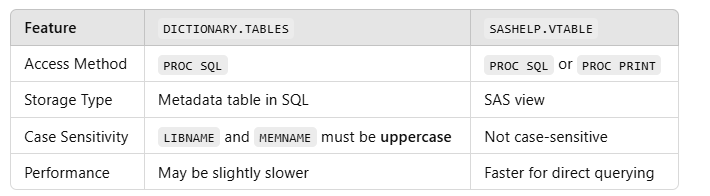


* LIBNAME must be uppercase.
* Retrieves dataset names, types, creation dates, and observation counts.

In [ ]:
proc sql;
    select memname, nobs 
        from dictionary.tables
        where libname = 'SASHELP' 
          and memtype='DATA';
quit;

In [ ]:
proc sql;
    select memname, nobs
    from sashelp.vtable
    where libname = 'SASHELP' and memtype = 'DATA';
quit;

### SASHELP.VTABLE 

* has the information on the number of   numeric variables and the number of character variables
  for every SAS dataset: num_character, num_numeric.



In [5]:
proc print data=sashelp.vtable;
    var memname nobs;
    where libname = 'SASHELP' and memtype = 'DATA';
quit;

Obs,memname,nobs
1,AACOMP,2020
2,AARFM,130
3,ADSMSG,426
4,AFMSG,1090
5,AIR,144
6,APPLIANC,156
7,ASSCMGR,402
8,BASEBALL,322
9,BEI,24205
10,BIRTHWGT,100000


#### Accessing identical variable names from multiple SAS data sets

In [3]:
*Ex9_Dictionary_column.sas;
OPTIONS nocenter nodate nonumber ;
proc sql;
 SELECT MEMNAME 'Table Names', NAME
  FROM DICTIONARY.COLUMNS  
   WHERE LIBNAME="SASHELP" AND  
         NAME = "Weight";  
QUIT;

Table Names,Column Name
BWEIGHT,Weight
CARS,Weight
CLASS,Weight
CLASSFIT,Weight
FISH,Weight
GRIDDED,Weight
HEART,Weight


In [34]:
 *Ex9_Dictionary_column.sas (Part 4);
OPTIONS nocenter nodate nonumber nonotes nosource ;
ods html close;
%let lref=SASHELP;
%let dsn=CLASS;

proc sql noprint;
select num_character, num_numeric into :n_char_x, :n_num_x
from sashelp.vtable
where libname = upcase("&lref.") and upcase(memname) = upcase("&dsn.");
quit;

%put Number of character variables = &n_char_x;
%put Number of numeric variables = &n_num_x;


In [36]:
 *Ex9_Dictionary_column.sas (Part 6);
 OPTIONS nocenter nodate nonumber nonotes nosource ;
ods html close;

* Data Step Approach;
Data test;
  set sashelp.cars;
  array nums(*) _numeric_;
  array chrs(*) _character_;
     call symputx('nb1',dim(nums),'G');
     call symputx('nb2',dim(chrs),'G');
run;

%put Number of numeric variables = &nb1;
%put Number of numeric variables = &nb2;


In the sample program below, we want to create a macro variable whose values have the suffix “_Status” from the dataset “HEART” saved in the “SASHELP” library. 

[A Simple Macro to Select Various Variables Lists ](https://www.pharmasug.org/proceedings/2015/QT/PharmaSUG-2015-QT10.pdf)

In [38]:
*Ex9_Dictionary_column.sas (Part 7);
OPTIONS nocenter nodate nonumber nonotes nosource ;
ods html close;
proc sql noprint; 
 select name into :varlist_status separated by ' '
 from dictionary.columns
 where libname='SASHELP' and memname='HEART'
 and name like "%#_Status" escape '#';
 quit;
%put &varlist_status;

In [46]:
*Ex9_Dictionary_column.sas (Part 7);
OPTIONS nocenter nodate nonumber nonotes nosource ;
ods html close;
proc sql noprint; 
 select name into :varlist separated by ' '
 from dictionary.columns
 where libname='SASHELP' and memname='HEART'
 and name like '%_Status%';
 quit;
%put &varlist;

```
proc sql;
select memname,
        nobs format =comma9.
       ,nvar format =comma9.
       ,DATEPART(crdate) format date9. as Date_created label='Creation Date'
       ,TIMEPART(crdate) format timeampm. as Time_created label='Creation Time'
from dictionary.tables
 where libname='SDS' and memname like "H%";
 quit;
 
```

PROC CONTENTS can be used to:

* display metadata about a dataset.
* show variable names, types, lengths, labels, formats, and dataset-level attributes.
* learn about a single dataset at a time.


In [ ]:
proc contents data=sashelp._all_ nods;
run;

*proc contents data=sashelp.class;
*run;
